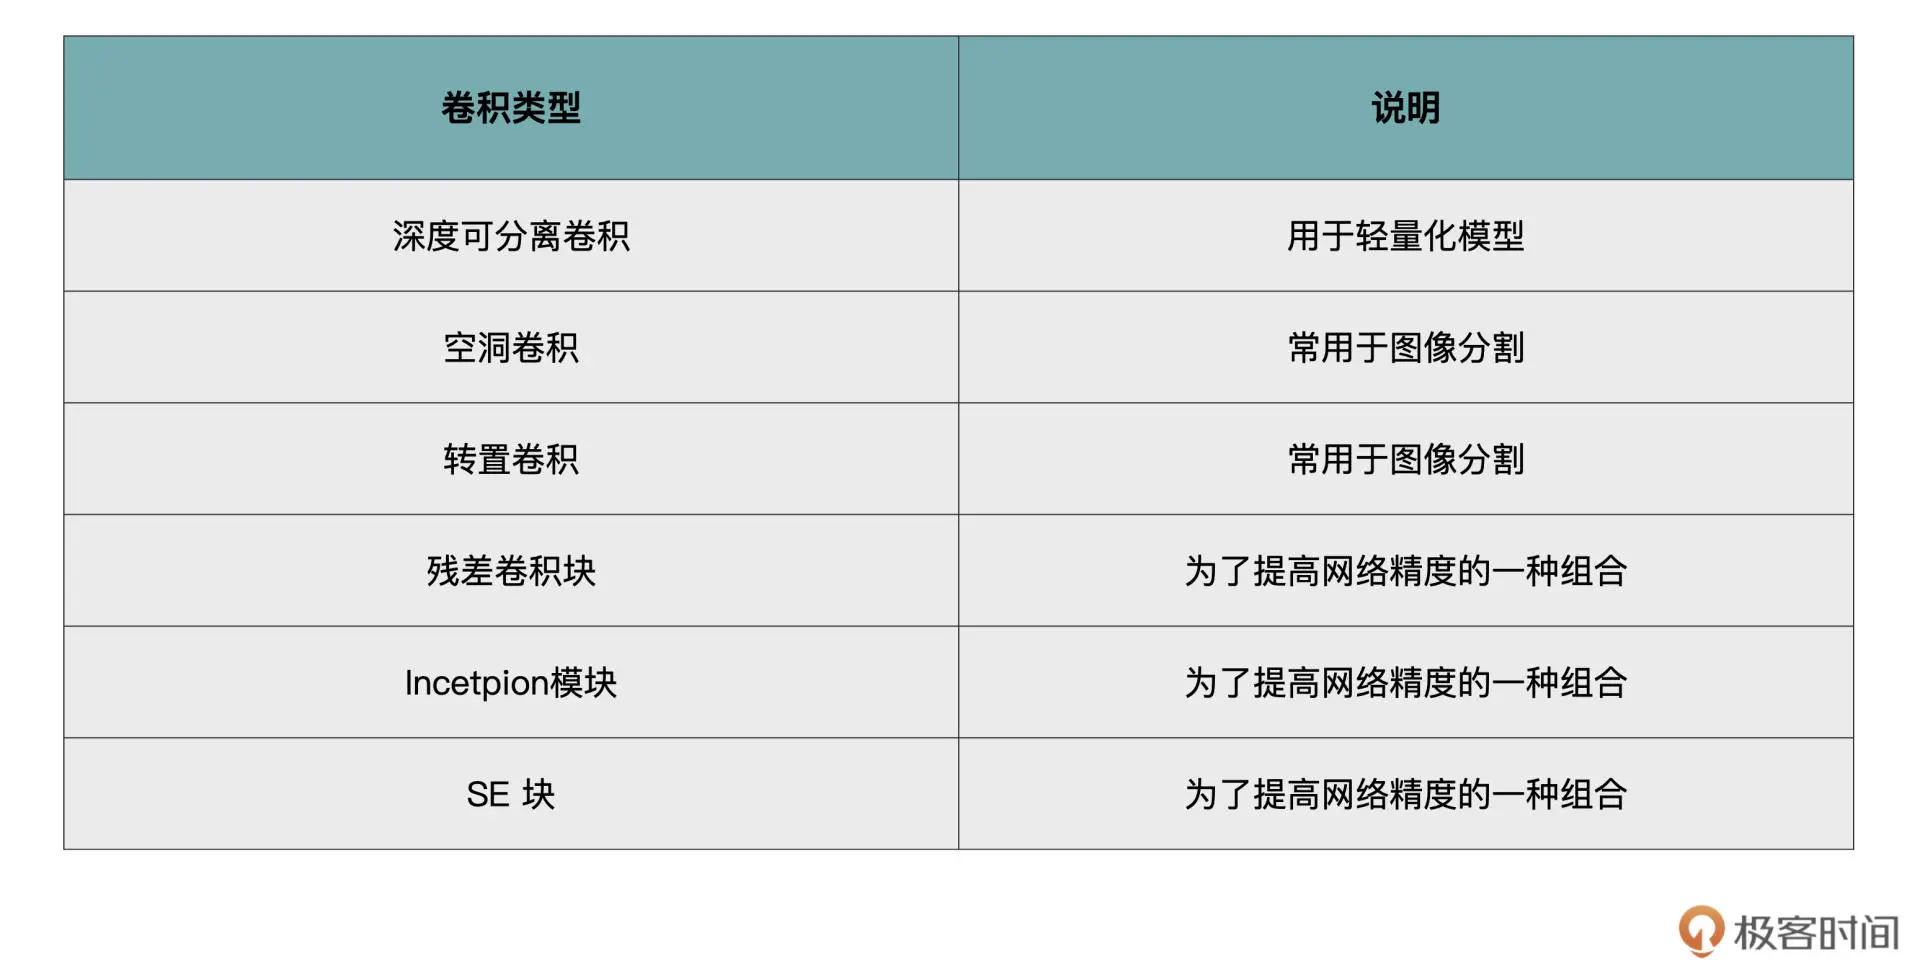

# 深度可分离卷积（Depthwise Separable Convolution）

    首先看看依托 groups 参数实现的深度可分离卷积。

    深度可分离卷积就是谷歌在 MobileNet v1 中提出的一种轻量化卷积。
    简单来说，深度可分离卷积就是我们刚才所说的在效果近似相同的情况下，需要的计算量更少。
    
    
    深度可分离卷积（Depthwise Separable Convolution）由 Depthwise（DW）和 Pointwise（PW）这两部分卷积组合而成的。
    
## 标准卷积
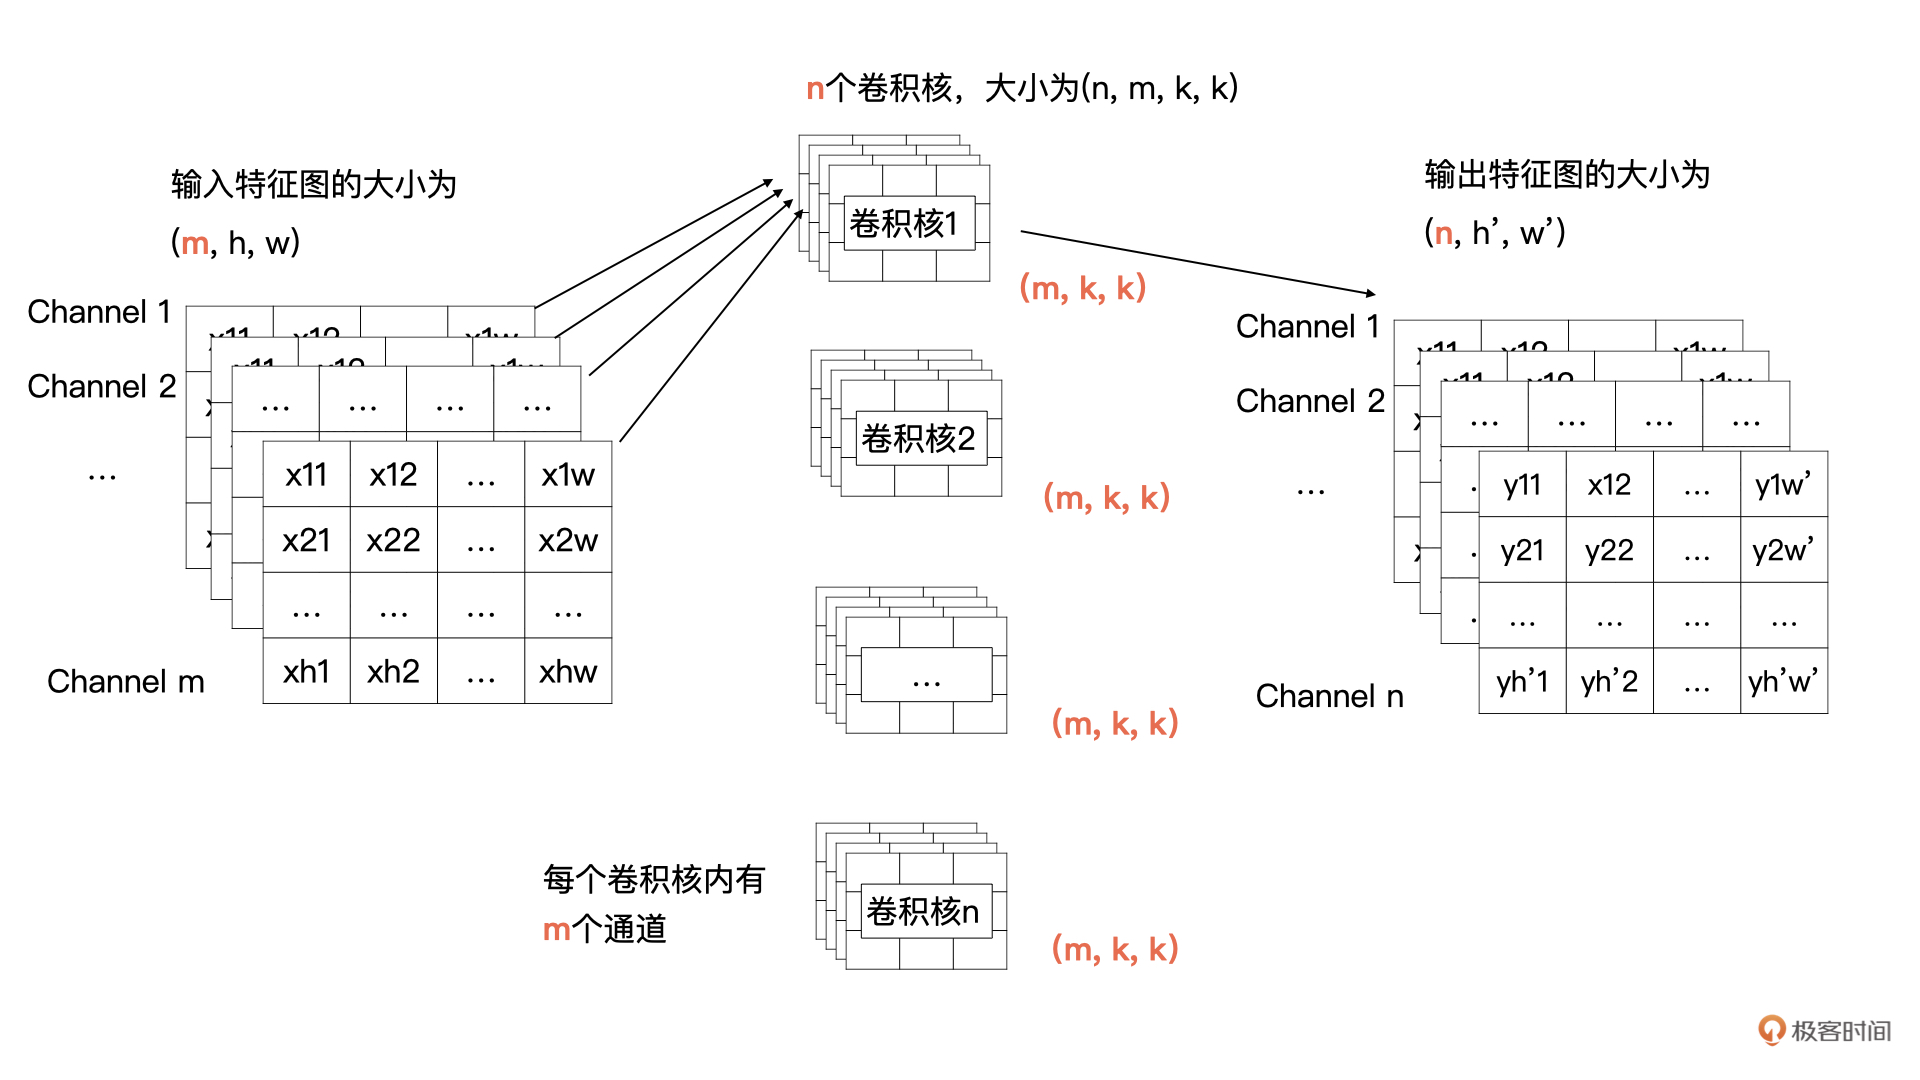
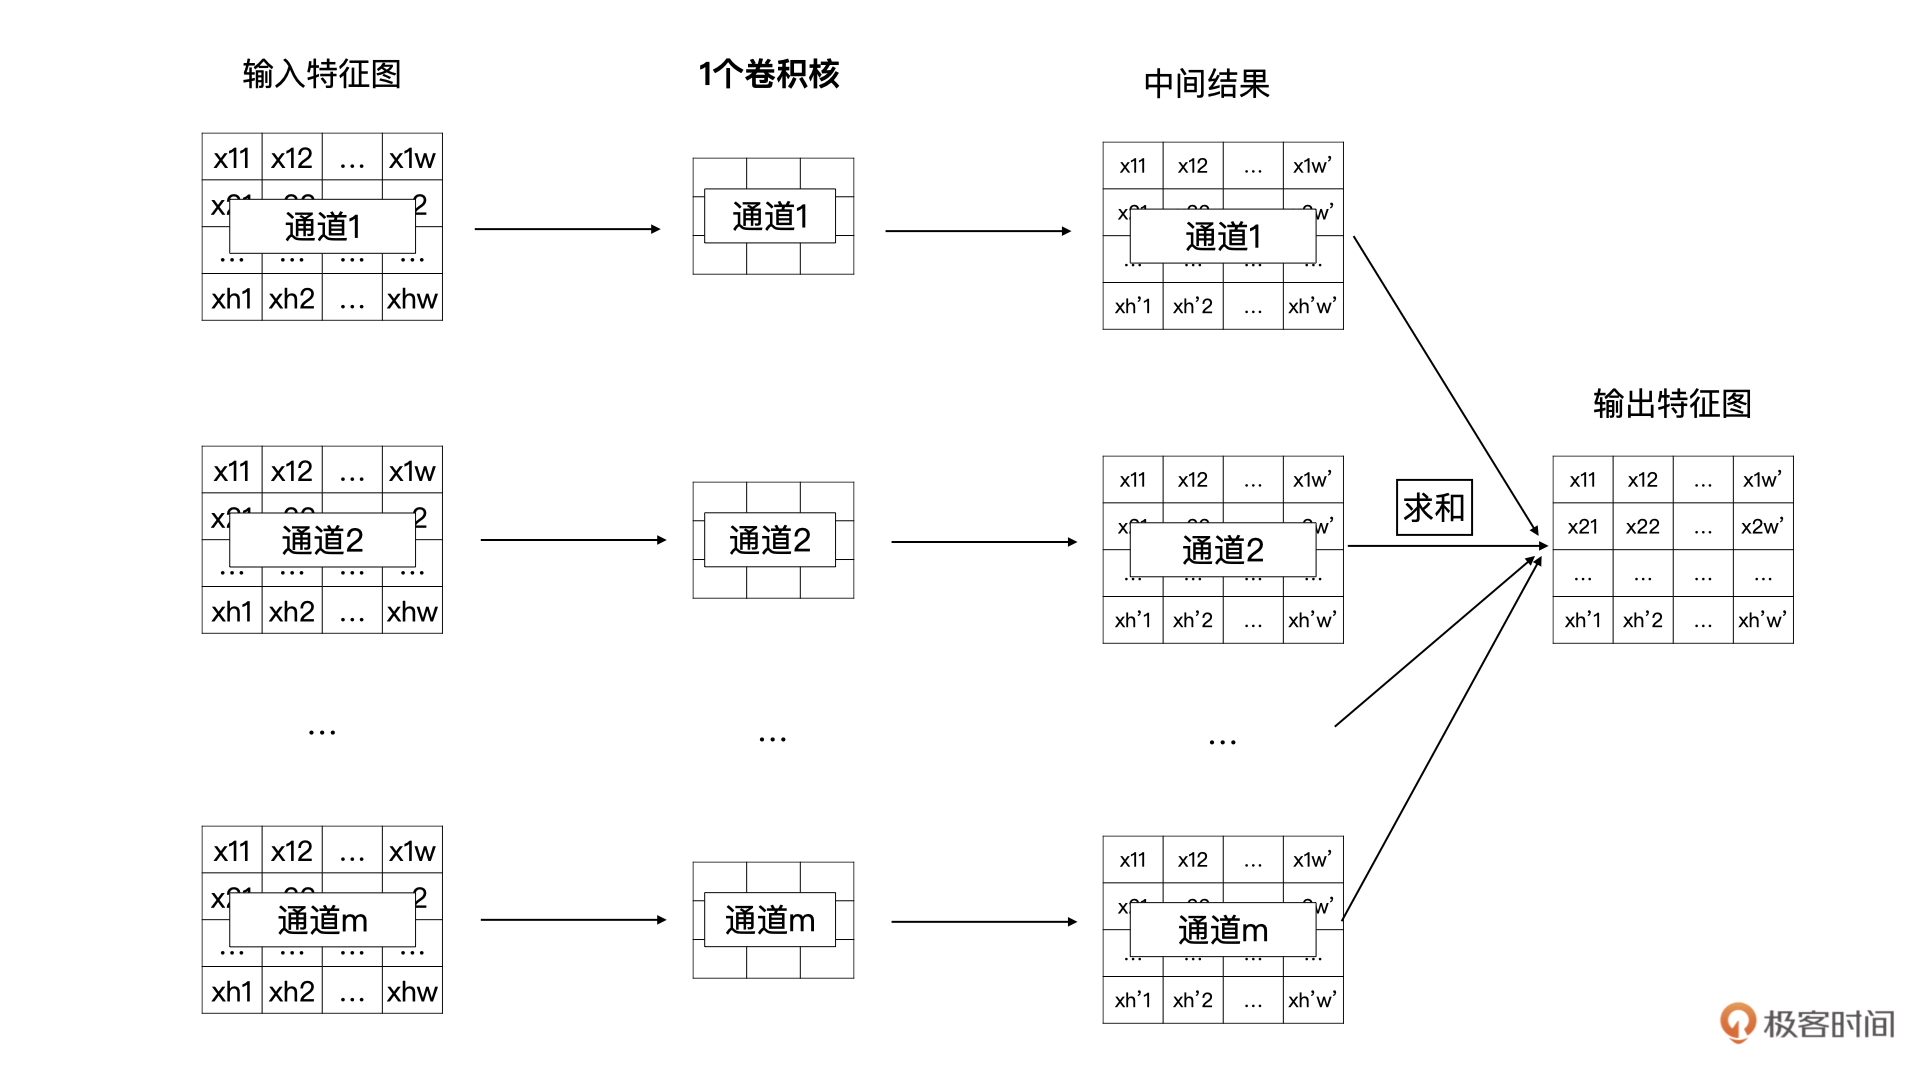

## Depthwise（DW）卷积

DW 卷积就是有 m 个卷积核的卷积，每个卷积核中的通道数为 1，这 m 个卷积核分别与输入特征图对应的通道数据做卷积运算，所以 DW 卷积的**输出是有 m 个通道的特征图**。通常来说，DW 卷积核的大小是 3x3 的。

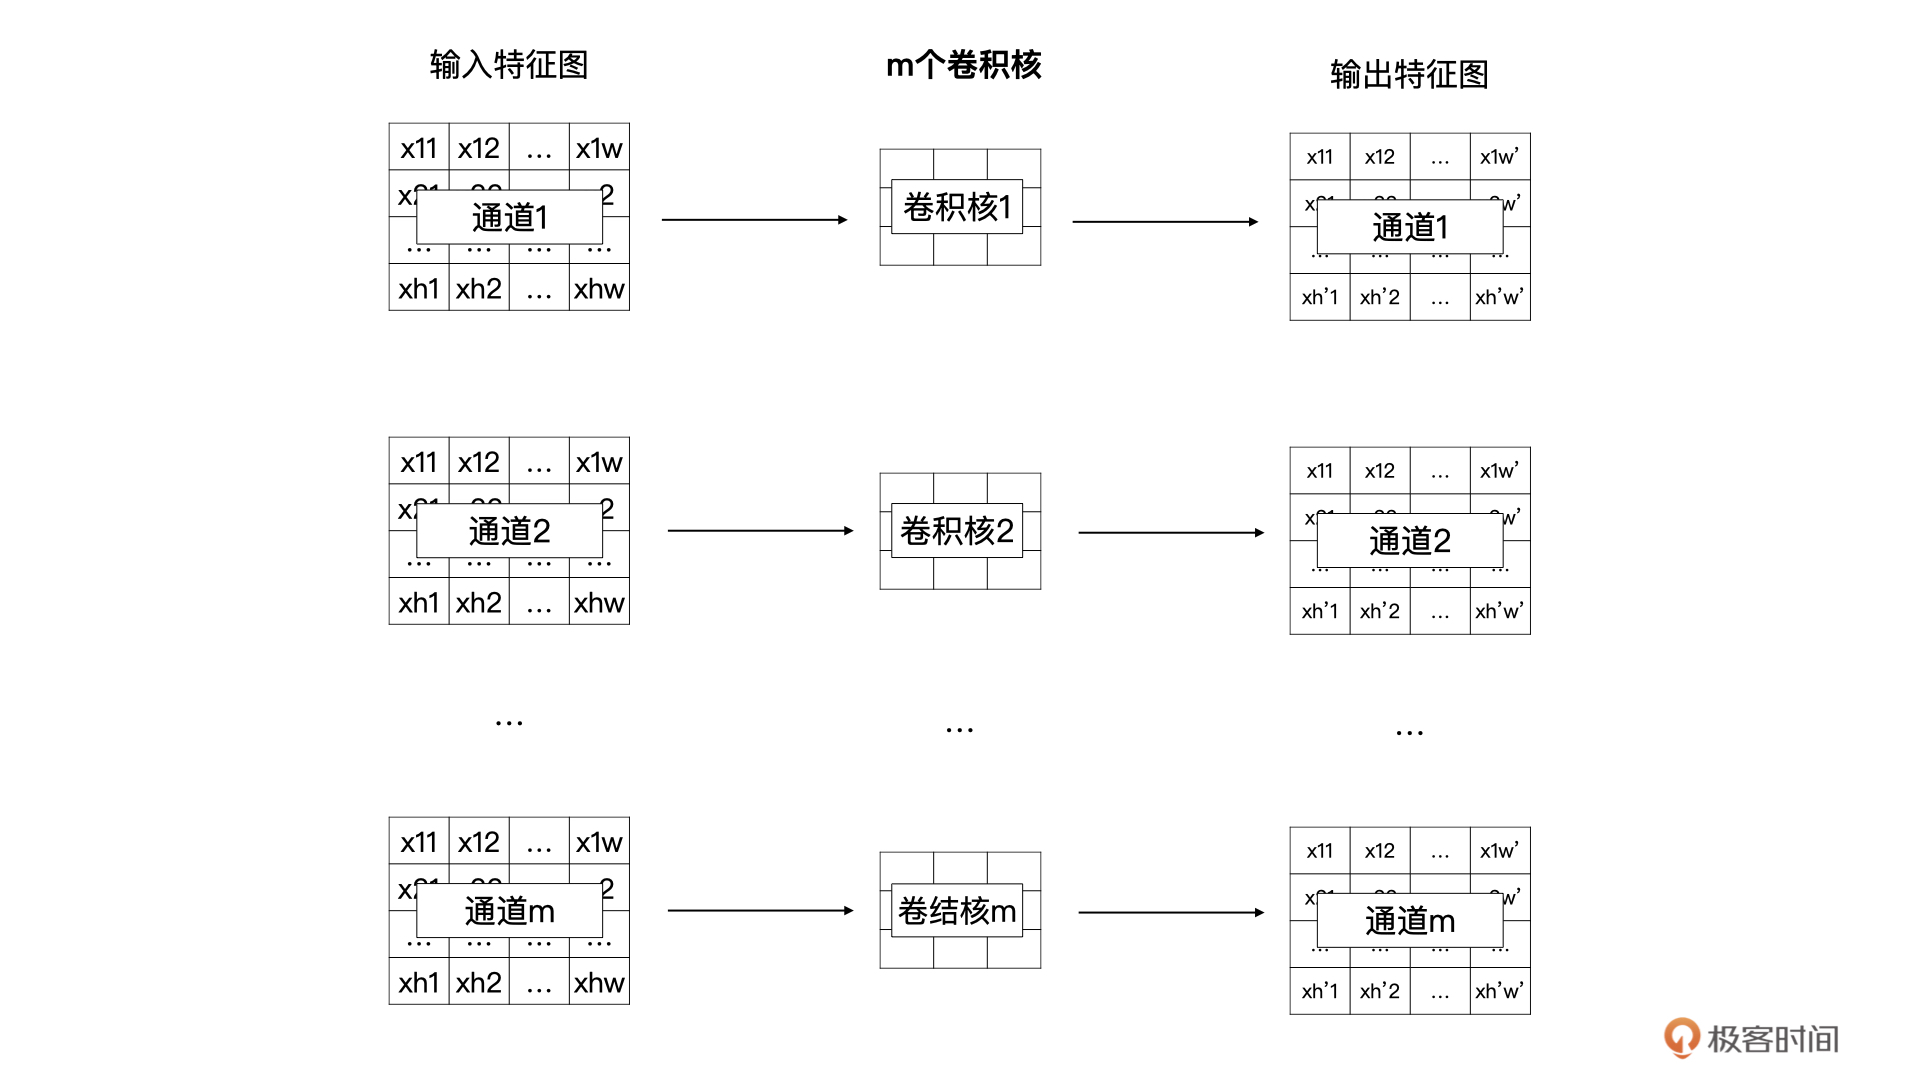

## Pointwise（PW）卷积


深度可分离卷积中，我们最终要获得一个具有 n 个通道的输出特征图，而刚才介绍的 DW 卷积显然没有达到，
DW 卷积也忽略了输入特征图通道之间的信息。


DW 之后我们还要加一个 PW 卷积。PW 卷积也叫做逐点卷积。PW 卷积的主要作用就是将 DW 输出的 m 个特征图结合在一起考虑，再输出一个具有 n 个通道的特征图。

在卷积神经网络中，我们经常可以看到使用 1x1 的卷积，**1x1 的卷积主要作用就是升维与降维**。所以，在 DW 的输出之后的 PW 卷积，就是 n 个卷积核的 1x1 的卷积，每个卷积核中有 m 个通道的卷积数据。

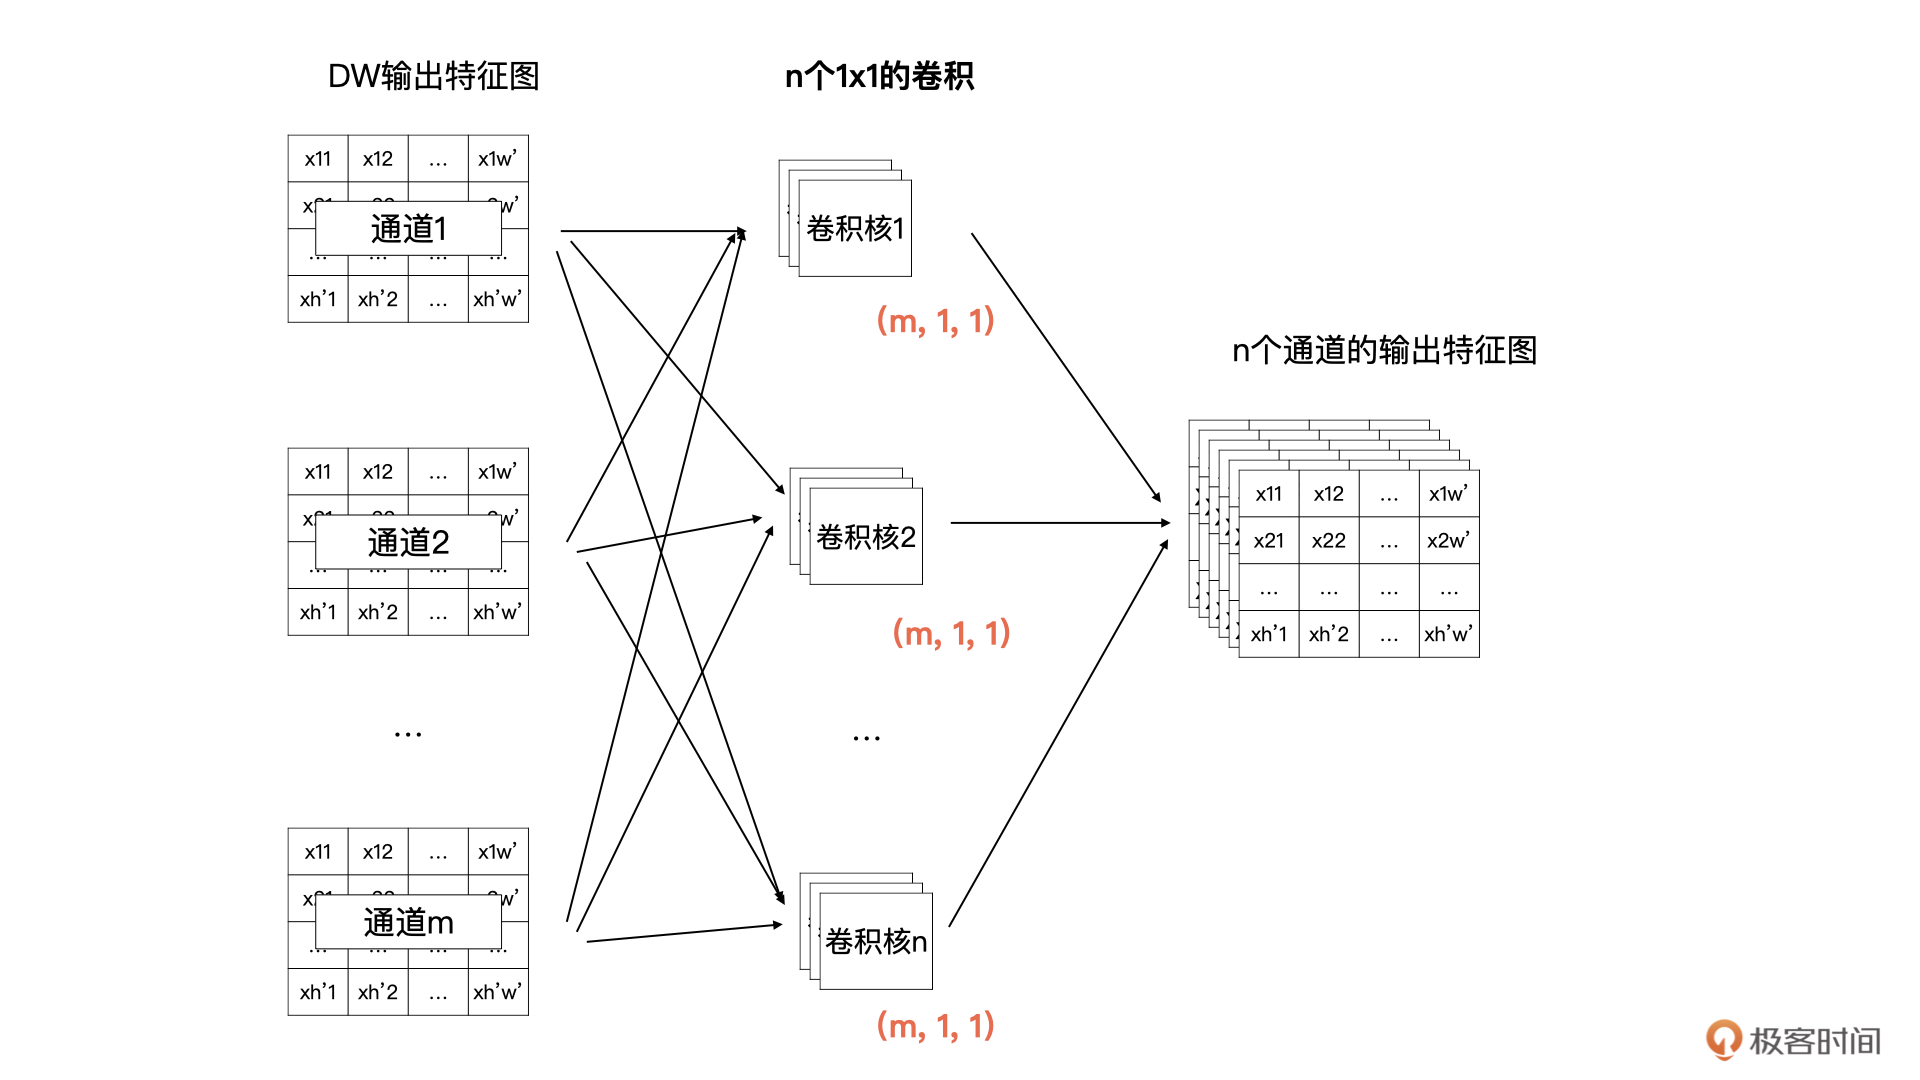

## 计算量

## PyTorch 中的实现




In [3]:
import torch
import torch.nn as nn

# 生成一个三通道的5x5特征图
x = torch.rand((3, 5, 5)).unsqueeze(0)
print(x.shape)

# 请注意DW中，输入特征通道数与输出通道数是一样的
in_channels_dw = x.shape[1]
out_channels_dw = x.shape[1]
# 一般来讲DW卷积的kernel size为3
kernel_size = 3
stride = 1
# DW卷积groups参数与输入通道数一样
dw = nn.Conv2d(in_channels_dw, out_channels_dw, kernel_size, stride, groups=in_channels_dw)

torch.Size([1, 3, 5, 5])


1.DW 中，输入特征通道数与输出通道数是一样的；
2. 一般来讲，DW 的卷积核为 3x3；
3.DW 卷积的 groups 参数与输出通道数是一样的。

In [4]:

in_channels_pw = out_channels_dw
out_channels_pw = 4
kernel_size_pw = 1
pw = nn.Conv2d(in_channels_pw, out_channels_pw, kernel_size_pw, stride)
out = pw(dw(x))
print(out.shape)

torch.Size([1, 4, 3, 3])


# 空洞卷积

# 小结

# 每日一练

# QA

# todo